In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("rubbers.csv")
df.describe()

,rank,speed,spin,control,tackiness,weight,hardness,gears,throw_angle,consistency,durable,overall,ratings,price
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,297.000000,8.469140,8.770320,8.725464,3.354637,4.662732,5.240472,7.367622,4.989882,8.679427,7.277066,8.877234,31.699831,38.565481
std,171.328632,0.854445,0.786346,0.455495,2.241346,1.379499,2.066908,1.336923,1.163071,0.969492,1.071694,0.473669,34.294890,17.391671
min,1.000000,3.900000,2.500000,6.400000,0.000000,1.100000,0.200000,1.300000,0.300000,5.000000,3.100000,5.800000,10.000000,0.000000
25%,149.000000,8.200000,8.500000,8.500000,1.800000,3.700000,3.900000,6.600000,4.300000,8.100000,6.700000,8.600000,14.000000,25.000000
50%,297.000000,8.700000,9.000000,8.800000,2.500000,4.600000,5.400000,7.600000,5.100000,8.900000,7.400000,9.000000,22.000000,40.000000
75%,445.000000,9.100000,9.200000,9.100000,4.900000,5.700000,6.700000,8.400000,5.800000,9.400000,8.100000,9.200000,36.000000,50.000000
max,593.000000,9.500000,9.600000,9.500000,8.900000,8.900000,9.900000,9.400000,8.400000,10.000000,9.400000,9.500000,374.000000,100.000000


In [95]:
df["brand"] = [name.split()[0] for name in df["name"]]
top_brands = df.groupby("brand").size().nlargest(10)
top_brands

brand
Donic             52
Butterfly         50
Tibhar            48
Stiga             44
DHS               41
Andro             39
Friendship/729    35
Xiom              31
Yasaka            30
Nittaku           29
dtype: int64

In [96]:
df = df[df["brand"].isin(top_brands.index)]
df.describe()

,rank,speed,spin,control,tackiness,weight,hardness,gears,throw_angle,consistency,durable,overall,ratings,price
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,292.819549,8.503509,8.766667,8.681203,3.401003,4.668421,5.215288,7.465664,4.964912,8.746115,7.289975,8.877193,36.253133,42.256767
std,172.743027,0.863112,0.842118,0.447913,2.234966,1.380319,2.173364,1.354927,1.182949,0.917380,1.070575,0.502312,39.882914,15.900309
min,1.000000,3.900000,2.500000,6.400000,0.000000,1.100000,0.200000,1.600000,0.300000,5.400000,3.100000,5.800000,10.000000,0.000000
25%,142.500000,8.200000,8.600000,8.500000,1.900000,3.800000,3.550000,6.600000,4.200000,8.200000,6.700000,8.650000,15.500000,32.975000
50%,295.000000,8.700000,9.000000,8.700000,2.500000,4.600000,5.400000,7.800000,5.100000,8.900000,7.400000,9.000000,23.000000,43.990000
75%,434.000000,9.100000,9.200000,9.000000,4.700000,5.700000,6.750000,8.500000,5.800000,9.400000,8.000000,9.200000,41.500000,53.000000
max,593.000000,9.500000,9.600000,9.400000,8.600000,8.500000,9.900000,9.400000,8.400000,10.000000,9.300000,9.500000,374.000000,100.000000


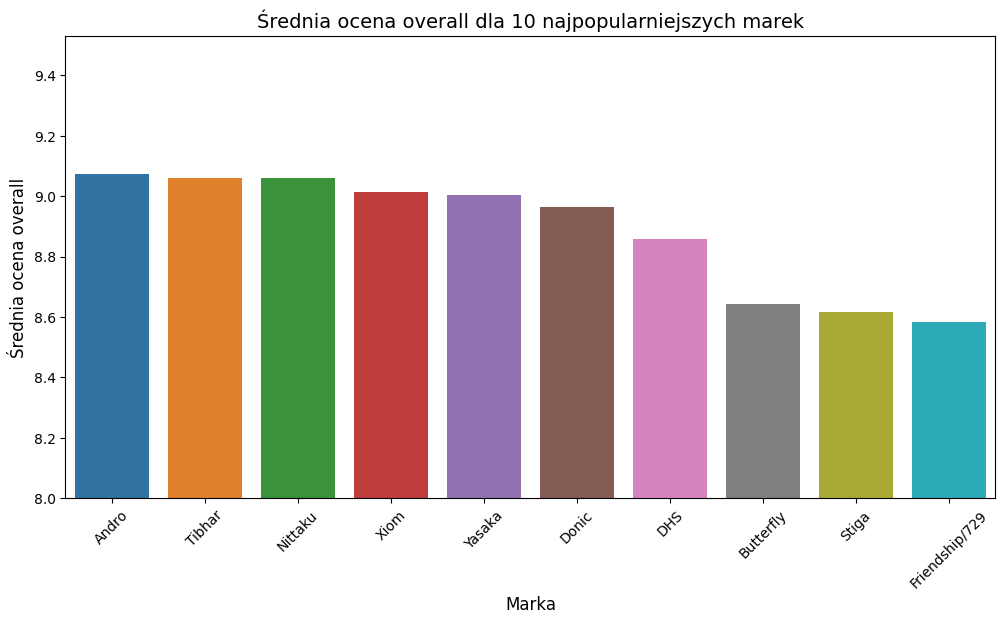

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

brand_overall = df.groupby("brand")["overall"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_overall.index,hue=brand_overall.index,y=brand_overall.values)


plt.title("Średnia ocena overall dla 10 najpopularniejszych marek", fontsize=14)
plt.xlabel("Marka", fontsize=12)
plt.ylabel("Średnia ocena overall", fontsize=12)
plt.ylim(8)
plt.xticks(rotation=45)

plt.show()

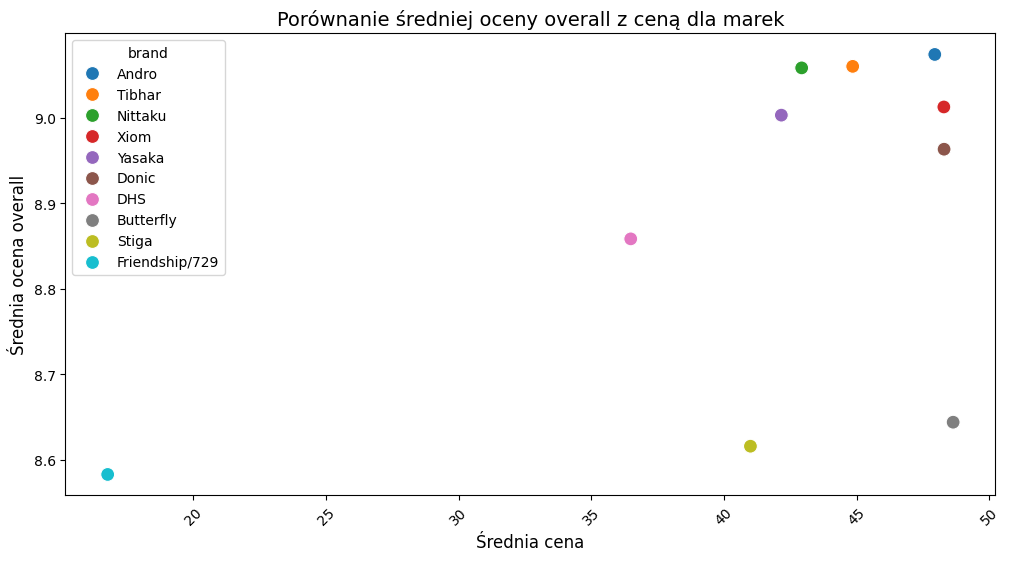

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

brand_stats = df.groupby("brand").agg(
    overall_mean=('overall', 'mean'),
    price_mean=('price', 'mean')
).sort_values(by="overall_mean", ascending=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=brand_stats['price_mean'], y=brand_stats['overall_mean'], hue=brand_stats.index, s=100)
plt.title("Porównanie średniej oceny overall z ceną dla marek", fontsize=14)
plt.xlabel("Średnia cena", fontsize=12)
plt.ylabel("Średnia ocena overall", fontsize=12)

plt.xticks(rotation=45)
plt.show()